In [ ]:
import sklearn.datasets
import numpy as np


In [ ]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [ ]:
X=breast_cancer.data
Y=breast_cancer.target

In [ ]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [ ]:
import pandas as pd

In [ ]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)#columns to name the columns

In [ ]:
data['class']=breast_cancer.target # to add the labels

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()#to calculate mean std and all

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print(data['class'].value_counts())

print(breast_cancer.target_names)

1    357
0    212
Name: class, dtype: int64
['malignant' 'benign']


In [ ]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**Test train split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop('class',axis=1)  #axis=1 for columns and 0 for row
Y=data['class']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)#random_state to make sure the split remains same even after running the code for multipke times

In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (512,) (57,)


In [ ]:
print(Y.mean(),Y_train.mean(),Y_test.mean()) #used stratify to maintain the ratio of benign and malign same

0.6274165202108963 0.626953125 0.631578947368421


**Binarisation**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.097110,0.2041,0.06898,0.2530,0.8749,3.4660,24.190,0.006965,0.06213,0.07926,0.022340,0.01499,0.005784,16.35,27.57,125.40,832.7,0.1419,0.7090,0.90190,0.24750,0.2866,0.11550
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,0.2636,0.7294,1.8480,19.870,0.005488,0.01427,0.02322,0.005660,0.01428,0.002422,13.76,20.70,89.88,582.6,0.1494,0.2156,0.30500,0.06548,0.2747,0.08301
105,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.096010,0.1925,0.07692,0.3908,0.9238,2.4100,34.660,0.007162,0.02912,0.05473,0.013880,0.01547,0.007098,16.31,22.40,106.40,827.2,0.1862,0.4099,0.63760,0.19860,0.3147,0.14050
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,1.3120,2.2750,20.980,0.010980,0.01257,0.01031,0.003934,0.02693,0.002979,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875
547,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,0.1669,0.06714,0.1144,1.0230,0.9887,7.326,0.010270,0.03084,0.02613,0.010970,0.02277,0.005890,10.83,22.04,71.08,357.4,0.1461,0.2246,0.17830,0.08333,0.2691,0.09479


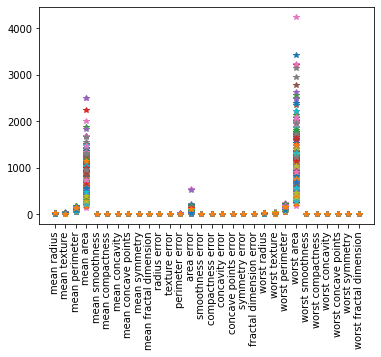

In [ ]:
plt.plot(X_train.T,'*')#transpose to visulaize clearly

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_4_train=X_train['mean area'].map(lambda x:0 if x<1000 else 1)

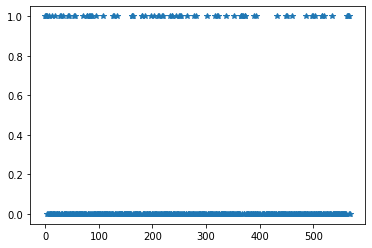

In [ ]:
plt.plot(X_binarised_4_train,'*')

In [ ]:
#Lets do it with library



x_binarised_train=X_train.apply(pd.cut,bins=2,labels=[1,0])

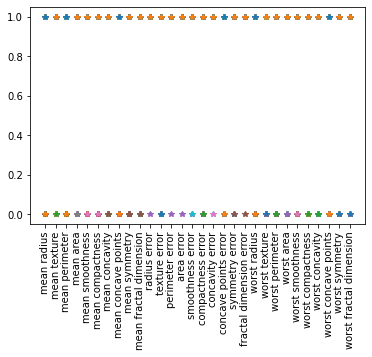

In [ ]:
plt.plot(x_binarised_train.T,'*')#transpose to visulaize clearly

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
x_binarised_test=X_test.apply(pd.cut,bins=2,labels=[1,0])

In [ ]:
#convert to numpy array
x_binarised_train=np.asarray(x_binarised_train)

#x_binarised_test=x_binarised_test.values [another way to convert to numpy array]


x_binarised_test=np.asarray(x_binarised_test)

type(x_binarised_test)

numpy.ndarray

In [ ]:
#check for particular b and 100th row
b=3

i=100

if np.sum((x_binarised_train[i,:])>=b):
  print("Malign")
else:
  print("benign")

if(Y_train[i]==1):
  print("ground truth is malign")
else:
  print("ground truth is benign")




benign
ground truth is benign


In [ ]:
b=3

y_pre_train=[]
accurate_rows=0

for x,y in zip(x_binarised_train,Y_train):
  y_pre=(np.sum(x)>=b)
  y_pre_train.append(y_pre)
  accurate_rows+=(y==y_pre)


print(accurate_rows,accurate_rows/x_binarised_train.shape[0])


321 0.626953125


In [ ]:
for b in range (x_binarised_train.shape[1]+1):
  y_pre_train=[]
  accurate_rows=0

  for x,y in zip(x_binarised_train,Y_train):
    y_pre=(np.sum(x)>=b)
    y_pre_train.append(y_pre)
    accurate_rows+=(y==y_pre)


  print(b,accurate_rows/x_binarised_train.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [ ]:
data.groupby('class').mean() 
# as we can see class 0 ,benign have more radius,
#texture and everything more than class 1 hence we need to change the binarisation
#that is higher value contribute to zero and lower value contribute to 1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**Test data accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
  b=28#from train data
  y_pre_test =[]
  

  for x in (x_binarised_test):
    y_pre=(np.sum(x)>=b)
    y_pre_test.append(y_pre)
  
  accuracy=accuracy_score(y_pre_test,Y_test)


  print(b,accuracy)

28 0.7894736842105263


#Class Mp Neuron

In [ ]:
class Mp_neuron:

  def __init__(self):

    self.b=None

  def model(self,x):
    return(sum(x)>=self.b)

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    accuracy={}

    for b in range (X.shape[1]+1):
      self.b=b
      y_pre=self.predict(X)
      accuracy[b]=accuracy_score(y_pre,Y)

    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b
    print("optimal b is ",best_b)
    print("Highest accuracy is",accuracy[best_b])






In [ ]:
mp_neu=Mp_neuron()
mp_neu.fit(x_binarised_train,Y_train)

optimal b is  28
Highest accuracy is 0.849609375


#Perceptron class

In [ ]:
class perceptron:
  def __init__(self):
    self.w=None
    self.b=None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs=1,lr=1):
    #lr is the learning rate
    self.w=np.ones(X.shape[1])
    self.b=0
    accuracy={}
    max_accuracy=0

    w_matrix=[]#storing w for animation purpose


    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y==1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b+1*lr
        elif y==0 and y_pred==1:
          self.w=self.w-x*lr
          self.b=self.b-1*lr

          #filling the wights
      w_matrix.append(self.w)
      accuracy[i]=accuracy_score(self.predict(X),Y)
      if(accuracy[i]>max_accuracy):
        max_accuracy=accuracy[i]
        chkptw=self.w   #checkpointing to make sure that our final w is the optimum w
        chkptb=self.b
    
    self.w=chkptw
    self.b=chkptb
    print(max_accuracy)
    
    plt.plot( np.array(list(accuracy.values())).astype(float))
    plt.ylim([0,1])
    plt.xlabel("Epochs or iteration")
    plt.ylabel("accuracy")
    plt.show()

    return np.array(w_matrix)

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train) #convert to array
X_test=np.array(X_test)

0.927734375


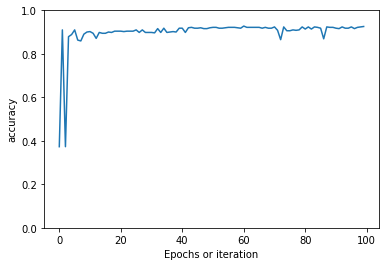

In [ ]:
perc=perceptron()
weight_matrix=perc.fit(X_train,Y_train,100,lr=1)

In [ ]:
type(weight_matrix)

numpy.ndarray

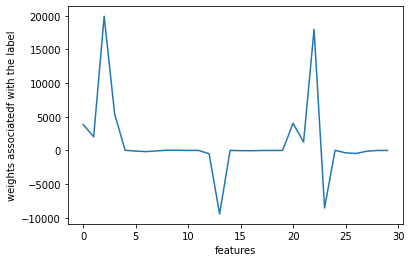

In [ ]:
#code to plot w
plt.plot(perc.w) # all the 30 features
plt.xlabel("features")
plt.ylabel("weights associatedf with the label")
plt.show()

In [ ]:
Y_pred_train=perc.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.927734375


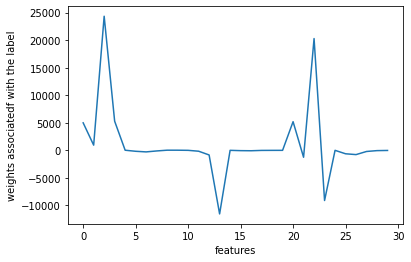

In [ ]:
plt.plot(weight_matrix[-1,:]) # plottin last row of weigh
plt.xlabel("features")
plt.ylabel("weights associatedf with the label")
plt.show()

***Model has been trained, look at the test accuracy ***

In [ ]:

Y_pred_test=perc.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9473684210526315


**Plotting animation**

In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

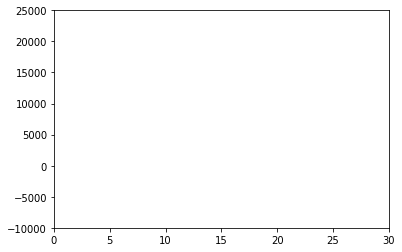

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, weight_matrix.shape[1]))#represent features
ax.set_ylim(( -10000,25000))#just the values y can take plt the weight_mstrix for last row

line, = ax.plot([], [], lw=2)

In [ ]:
print((weight_matrix.shape))

(100, 30)


In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(weight_matrix.shape[1]))#Just x-axis
    y = weight_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [ ]:
HTML(anim.to_html5_video())

**1)check for diffeerent train test split**

**2)do binarisation based on different values as, like 1000 ,2000**

**3)plot b vs accuracy for mp neuron**

**4)try different lr and epochs for perceptron model**